# Day 25
## Part 1

In [30]:
import numpy as np

with open("ex1.txt") as f:
    lines = [list(line.strip()) for line in f.readlines()]
    
print(lines)

field = np.array(lines)
print(field)

empty = set()
right = set()
down = set()

for coord, value in np.ndenumerate(field):  # coordinates are (y, x)
    if value == ".":
        empty.add((coord))
    elif value == "v":
        down.add((coord))
    else:
        right.add((coord))
            
print(empty)
print(right)
print(down)

[['v', '.', '.', '.', '>', '>', '.', 'v', 'v', '>'], ['.', 'v', 'v', '>', '>', '.', 'v', 'v', '.', '.'], ['>', '>', '.', '>', 'v', '>', '.', '.', '.', 'v'], ['>', '>', 'v', '>', '>', '.', '>', '.', 'v', '.'], ['v', '>', 'v', '.', 'v', 'v', '.', 'v', '.', '.'], ['>', '.', '>', '>', '.', '.', 'v', '.', '.', '.'], ['.', 'v', 'v', '.', '.', '>', '.', '>', 'v', '.'], ['v', '.', 'v', '.', '.', '>', '>', 'v', '.', 'v'], ['.', '.', '.', '.', 'v', '.', '.', 'v', '.', '>']]
[['v' '.' '.' '.' '>' '>' '.' 'v' 'v' '>']
 ['.' 'v' 'v' '>' '>' '.' 'v' 'v' '.' '.']
 ['>' '>' '.' '>' 'v' '>' '.' '.' '.' 'v']
 ['>' '>' 'v' '>' '>' '.' '>' '.' 'v' '.']
 ['v' '>' 'v' '.' 'v' 'v' '.' 'v' '.' '.']
 ['>' '.' '>' '>' '.' '.' 'v' '.' '.' '.']
 ['.' 'v' 'v' '.' '.' '>' '.' '>' 'v' '.']
 ['v' '.' 'v' '.' '.' '>' '>' 'v' '.' 'v']
 ['.' '.' '.' '.' 'v' '.' '.' 'v' '.' '>']]
{(4, 3), (4, 9), (3, 7), (5, 4), (4, 6), (5, 1), (5, 7), (8, 0), (0, 2), (8, 3), (8, 6), (2, 2), (1, 0), (1, 9), (2, 8), (7, 4), (7, 1), (3, 9)

In [29]:
def step(right, down, empty, field):
    limits = field.shape
    add_right = set()
    remove_right = set()
    add_down = set()
    remove_down = set()
    
    # first check rights then move them, then check downs and move them
    for cucumber in right:
        # adjacent square
        if cucumber[1] == field.shape[1] - 1:  # on edge of field
            target = (cucumber[0], 0)
        else:
            target = (cucumber[0], cucumber[1] + 1)
        if target in empty:  # can move
            add_right.add(target)
            remove_right.add(cucumber)
            
    for cucumber in remove_right:
        right.remove(cucumber)
        empty.add(cucumber)
    for cucumber in add_right:
        right.add(cucumber)
        empty.remove(cucumber)
        
    for cucumber in down:
        # adjacent square
        if cucumber[0] == field.shape[0] - 1:  # on edge of field
            target = (0, cucumber[1])
        else:
            target = (cucumber[0] + 1, cucumber[1])
        if target in empty:  # can move
            add_down.add(target)
            remove_down.add(cucumber)
            
    for cucumber in remove_down:
        down.remove(cucumber)
        empty.add(cucumber)
    for cucumber in add_down:
        down.add(cucumber)
        empty.remove(cucumber)
            
    for coord in empty:
        field[coord] = "."
    
    for coord in right:
        field[coord] = ">"
        
    for coord in down:
        field[coord] = "v"            
            
    return right, down, empty, field

In [31]:
print(field)

new_right, new_down, new_empty, new_field = step(right, down, empty, field)

[['v' '.' '.' '.' '>' '>' '.' 'v' 'v' '>']
 ['.' 'v' 'v' '>' '>' '.' 'v' 'v' '.' '.']
 ['>' '>' '.' '>' 'v' '>' '.' '.' '.' 'v']
 ['>' '>' 'v' '>' '>' '.' '>' '.' 'v' '.']
 ['v' '>' 'v' '.' 'v' 'v' '.' 'v' '.' '.']
 ['>' '.' '>' '>' '.' '.' 'v' '.' '.' '.']
 ['.' 'v' 'v' '.' '.' '>' '.' '>' 'v' '.']
 ['v' '.' 'v' '.' '.' '>' '>' 'v' '.' 'v']
 ['.' '.' '.' '.' 'v' '.' '.' 'v' '.' '>']]


In [32]:
print(field)

[['.' '.' '.' '.' '>' '.' '>' 'v' '.' '>']
 ['v' '.' 'v' '>' '.' '>' 'v' '.' 'v' '.']
 ['>' 'v' '>' '>' '.' '.' '>' 'v' '.' '.']
 ['>' '>' 'v' '>' 'v' '>' '.' '>' '.' 'v']
 ['.' '>' 'v' '.' 'v' '.' '.' '.' 'v' '.']
 ['v' '>' '>' '.' '>' 'v' 'v' 'v' '.' '.']
 ['.' '.' 'v' '.' '.' '.' '>' '>' '.' '.']
 ['v' 'v' '.' '.' '.' '>' '>' 'v' 'v' '.']
 ['>' '.' 'v' '.' 'v' '.' '.' 'v' '.' 'v']]


In [35]:
step_1_ex = np.array([list("....>.>v.>"), 
                      list("v.v>.>v.v."), 
                      list(">v>>..>v.."),
                      list(">>v>v>.>.v"), 
                      list(".>v.v...v."), 
                      list("v>>.>vvv.."), 
                      list("..v...>>.."), 
                      list("vv...>>vv."), 
                      list(">.v.v..v.v"),])

print(step_1_ex)
print()
print(field)
print(np.array_equal(step_1_ex, field))  # works the same as example :D

[['.' '.' '.' '.' '>' '.' '>' 'v' '.' '>']
 ['v' '.' 'v' '>' '.' '>' 'v' '.' 'v' '.']
 ['>' 'v' '>' '>' '.' '.' '>' 'v' '.' '.']
 ['>' '>' 'v' '>' 'v' '>' '.' '>' '.' 'v']
 ['.' '>' 'v' '.' 'v' '.' '.' '.' 'v' '.']
 ['v' '>' '>' '.' '>' 'v' 'v' 'v' '.' '.']
 ['.' '.' 'v' '.' '.' '.' '>' '>' '.' '.']
 ['v' 'v' '.' '.' '.' '>' '>' 'v' 'v' '.']
 ['>' '.' 'v' '.' 'v' '.' '.' 'v' '.' 'v']]

[['.' '.' '.' '.' '>' '.' '>' 'v' '.' '>']
 ['v' '.' 'v' '>' '.' '>' 'v' '.' 'v' '.']
 ['>' 'v' '>' '>' '.' '.' '>' 'v' '.' '.']
 ['>' '>' 'v' '>' 'v' '>' '.' '>' '.' 'v']
 ['.' '>' 'v' '.' 'v' '.' '.' '.' 'v' '.']
 ['v' '>' '>' '.' '>' 'v' 'v' 'v' '.' '.']
 ['.' '.' 'v' '.' '.' '.' '>' '>' '.' '.']
 ['v' 'v' '.' '.' '.' '>' '>' 'v' 'v' '.']
 ['>' '.' 'v' '.' 'v' '.' '.' 'v' '.' 'v']]
True


In [118]:
with open("sea_cucumbers.txt") as f:
    lines = [list(line.strip()) for line in f.readlines()]

field = np.array(lines)

empty = set()
right = set()
down = set()
for coord, value in np.ndenumerate(field):  # coordinates are (y, x)
    if value == ".":
        empty.add((coord))
    elif value == "v":
        down.add((coord))
    else:
        right.add((coord))

In [119]:
image_stack = []

old_field = np.zeros(field.shape)

step_count = 0
while not np.array_equal(old_field, field):
    old_field = field.copy()
    image_stack.append(old_field)
    right, down, empty, field = step(right, down, empty, field)
    step_count += 1
    
print(step_count)

417


## Making an animation of the sea cucumbers

In [120]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [121]:
print(field)

new_image_stack = []

for field in image_stack:
    field[field == "."] = "0"
    field[field == ">"] = "1"
    field[field == "v"] = "2"
    
    hold = field.astype(np.float64)
    hold[hold == 1] = 0.5
    hold[hold == 2] = 1

    new_image_stack.append(hold)

[['.' 'v' 'v' ... 'v' 'v' 'v']
 ['.' 'v' 'v' ... '>' 'v' 'v']
 ['>' 'v' 'v' ... '.' '>' 'v']
 ...
 ['v' '>' 'v' ... 'v' 'v' 'v']
 ['v' '>' 'v' ... 'v' 'v' 'v']
 ['>' 'v' 'v' ... 'v' 'v' 'v']]


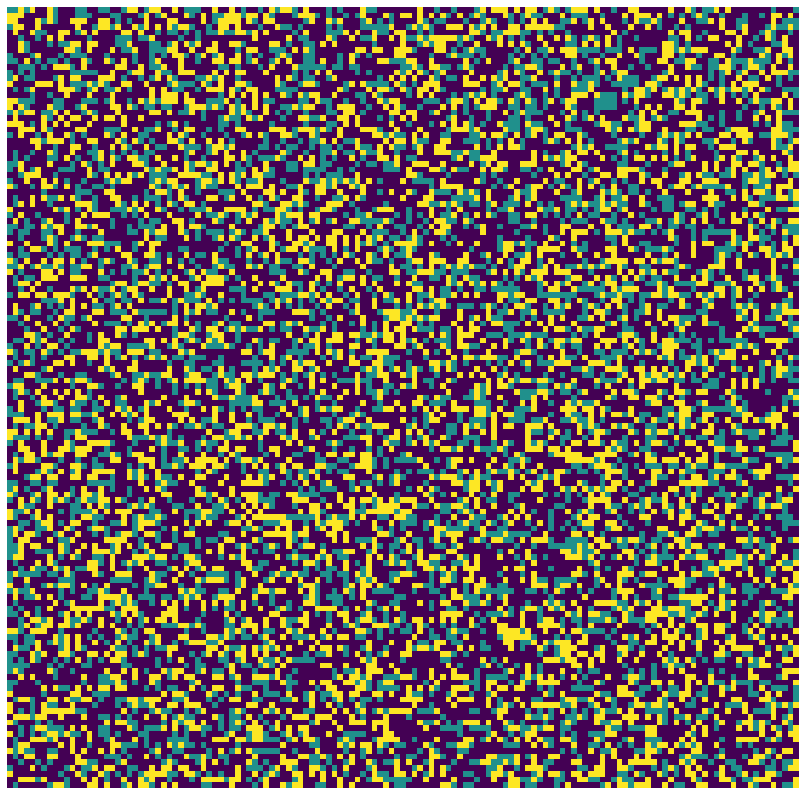

In [122]:
size = (11, 11)

fig = plt.figure(frameon=False)
fig.set_size_inches(size)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

ax.imshow(new_image_stack[0])
plt.show()

# Create an image out of it - black and white first

Starting to animate!


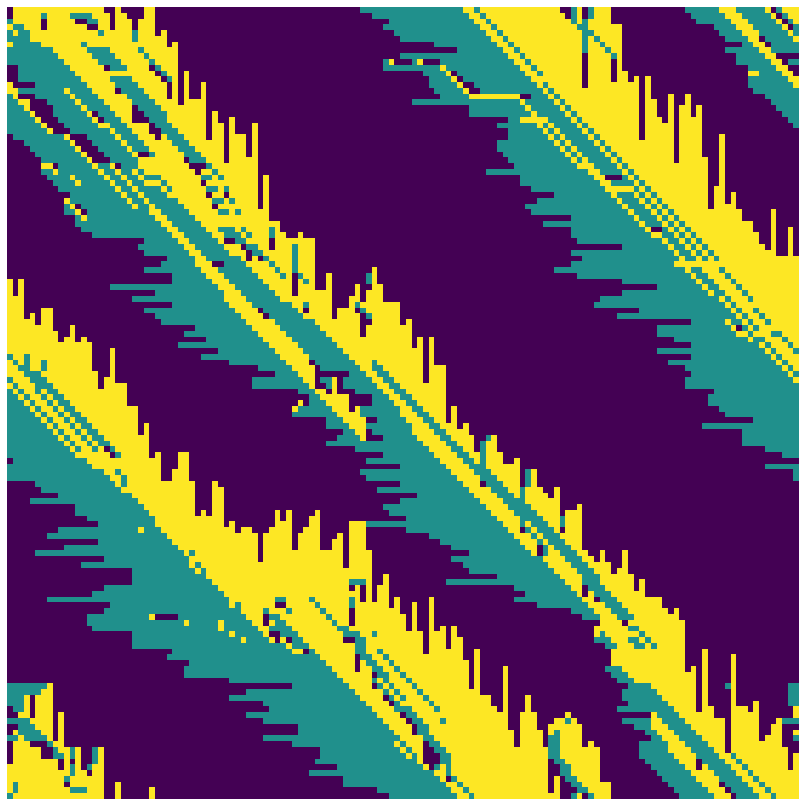

In [124]:
size = (11, 11)

fig = plt.figure()
fig.set_size_inches(size)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

movie_image = ax.imshow(new_image_stack[0], aspect="auto")

def animate(i): 
    # appending new points to x, y axes points list 
    movie_image.set_array(new_image_stack[i])
    return movie_image,

print("Starting to animate!")
# call the animator
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=len(new_image_stack), interval=1, blit=True) 

# save the animation as mp4 video file 
anim.save("sea_cucumbers.mp4", fps=20)